# Dinosaur Fossil Recorde Insights

## 1.	Introduction
### Problem Statement
This project is based on a competition I participated in through DataCamp. The problem statement was as follows: Imagine you're applying for a summer internship at a national museum of natural history. The museum has recently created a database containing all dinosaur records from past field campaigns. Your task is to explore these fossil records to uncover interesting insights and advise the museum on the quality of the data.

In this project, I utilized Python libraries such as Pandas and Numpy to handle missing data, create visualizations, identify trends over time, and extract meaningful insights from the provided dataset. The analysis aimed to answer key questions posed by the competition, such as:
### Questions
1. How many different dinosaur names are present in the data?
2. Which was the largest dinosaur? What about missing data in the dataset?
3. What dinosaur type has the most occurrences in this dataset? Create a visualization (table, bar chart, or equivalent) to display the number of dinosaurs per type. Use the AI assistant to tweak your visualization (colors, labels, title...).
4. Did dinosaurs get bigger over time? Show the relation between the dinosaur length and their age to illustrate this.
5. Create an interactive map showing each record.
6. Any other insights you found during your analysis?

By addressing these questions, the project sought to enhance the museum's understanding of its fossil collection and provide recommendations for data quality improvement.


## 2. Data
The dataset containing dinosaur records was collected from the Paleobiology Database ([source](https://paleobiodb.org/#/)). The following table gives a brief description of the columns and key variables.


| Column name | Description |
|---|---|
| occurence_no | The original occurrence number from the Paleobiology Database. |
| name | The accepted name of the dinosaur (usually the genus name, or the name of the footprint/egg fossil). |
| diet | The main diet (omnivorous, carnivorous, herbivorous). |
| type | The dinosaur type (small theropod, large theropod, sauropod, ornithopod, ceratopsian, armored dinosaur). |
| length_m | The maximum length, from head to tail, in meters. |
| max_ma | The age in which the first fossil records of the dinosaur where found, in million years. |
| min_ma | The age in which the last fossil records of the dinosaur where found, in million years. |
| region | The current region where the fossil record was found. |
| lng | The longitude where the fossil record was found. |
| lat | The latitude where the fossil record was found. |
| class | The taxonomical class of the dinosaur (Saurischia or Ornithischia). |
| family | The taxonomical family of the dinosaur (if known). |

The data was enriched with data from Wikipedia.

### 2.1. Initial Data Exploration

In [115]:
# Import the main libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [116]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [117]:
import folium
from folium.plugins import MarkerCluster

In [118]:
# Load the data
dinosaurs = pd.read_csv('dinosaurs.csv')
# Preview the dataframe
dinosaurs

,occurrence_no,name,diet,type,length_m,max_ma,min_ma,region,lng,lat,class,family
0,130294,Protarchaeopteryx,omnivorous,small theropod,2.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia,Archaeopterygidae
1,130295,Caudipteryx,omnivorous,small theropod,1.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia,Caudipterygidae
2,139242,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.528732,50.740726,Saurischia,Tyrannosauridae
3,139250,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.549347,50.737015,Saurischia,Tyrannosauridae
4,139252,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.564636,50.723866,Saurischia,Tyrannosauridae
...,...,...,...,...,...,...,...,...,...,...,...,...
4946,1360627,Isaberrysaura,NaN,NaN,NaN,171.6,168.40,Neuquén,-70.263290,-39.205288,Ornithischia,NaN
4947,1363632,Stegosaurus,herbivorous,armored dinosaur,9.0,157.3,152.10,Wyoming,-107.816666,44.650002,Ornithischia,Stegosauridae
4948,1363633,Othnielosaurus,NaN,NaN,NaN,157.3,152.10,Wyoming,-107.816666,44.650002,Ornithischia,NaN
4949,1364695,Iguanodon,herbivorous,ornithopod,10.0,145.0,139.80,Niedersachsen,9.959357,52.341167,Ornithischia,NaN


Look into each column data type and overview of numerical columns:

In [119]:
print(dinosaurs.info())
dinosaurs.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   occurrence_no  4951 non-null   int64  
 1   name           4951 non-null   object 
 2   diet           3596 non-null   object 
 3   type           3596 non-null   object 
 4   length_m       3568 non-null   float64
 5   max_ma         4951 non-null   float64
 6   min_ma         4951 non-null   float64
 7   region         4909 non-null   object 
 8   lng            4951 non-null   float64
 9   lat            4951 non-null   float64
 10  class          4951 non-null   object 
 11  family         3494 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 464.3+ KB
None


,occurrence_no,length_m,max_ma,min_ma,lng,lat
count,4.951000e+03,3568.000000,4951.000000,4951.000000,4951.000000,4951.000000
mean,6.838323e+05,8.212688,117.518477,106.622270,-37.048675,34.591448
std,3.021524e+05,6.629887,45.270821,44.395885,84.591106,23.961138
min,1.302090e+05,0.450000,70.600000,66.000000,-153.247498,-84.333336
25%,4.871225e+05,3.000000,83.500000,70.600000,-108.258705,36.274439
50%,5.618050e+05,6.700000,99.600000,89.800000,-96.099998,42.611198
75%,8.675665e+05,10.000000,155.700000,145.000000,27.383331,47.745138
max,1.365954e+06,35.000000,252.170000,247.200000,565.000000,78.101875


In [120]:
# Select only the columns with dtype 'object'
object_columns = dinosaurs.select_dtypes(include='object')

# Loop through each object column and print unique values
for column in object_columns.columns:
    print(f"Unique values in column '{column}':")
    print(dinosaurs[column].unique())
    print("\n" + "="*40 + "\n")  # For better readability


Unique values in column 'name':
['Protarchaeopteryx' 'Caudipteryx' 'Gorgosaurus' ... 'Elrhazosaurus'
 'Isaberrysaura' 'Luluichnus']


Unique values in column 'diet':
['omnivorous' 'carnivorous' 'herbivorous' nan]


Unique values in column 'type':
['small theropod' 'large theropod' 'sauropod' nan 'ornithopod'
 'ceratopsian' 'armored dinosaur']


Unique values in column 'region':
['Liaoning' 'Alberta' 'Maharashtra' 'Chubut' 'Colorado' 'New Mexico'
 'Arizona' 'Omnogov' 'Wyoming' 'Baden-Württemberg' 'Free State' 'Neuquén'
 'Matabeleland North' 'Andhra Pradesh' 'Aargau' 'Sachsen-Anhalt' 'Montana'
 'Utah' 'Texas' 'Oklahoma' 'New Jersey' 'Saône-et-Loire' 'Sichuan'
 'San Juan' 'Madhya Pradesh' 'England' 'Yunnan' 'Al Jizah' 'Matruh'
 'Illizi' 'Adrar' 'Tataouine' 'Agadez' 'Yafran' 'Tahoua'
 'Rio Grande do Sul' 'Er Rachida' 'Istarska Zupanija' nan 'Wales'
 'Nei Mongol' 'Hunedoara' 'Pernambuco' 'Ceará' 'Maryland'
 'Basse-Normandie' "Provence-Alpes-Côte d'Azur" 'Bouches-du-Rhône'
 'Río Negro' 'Quee

### 2.2 Missing Data
Find number of NULL values for each colums:

In [121]:
print(dinosaurs.isnull().sum())

occurrence_no       0
name                0
diet             1355
type             1355
length_m         1383
max_ma              0
min_ma              0
region             42
lng                 0
lat                 0
class               0
family           1457
dtype: int64


In [122]:
pip install missingno


Note: you may need to restart the kernel to use updated packages.


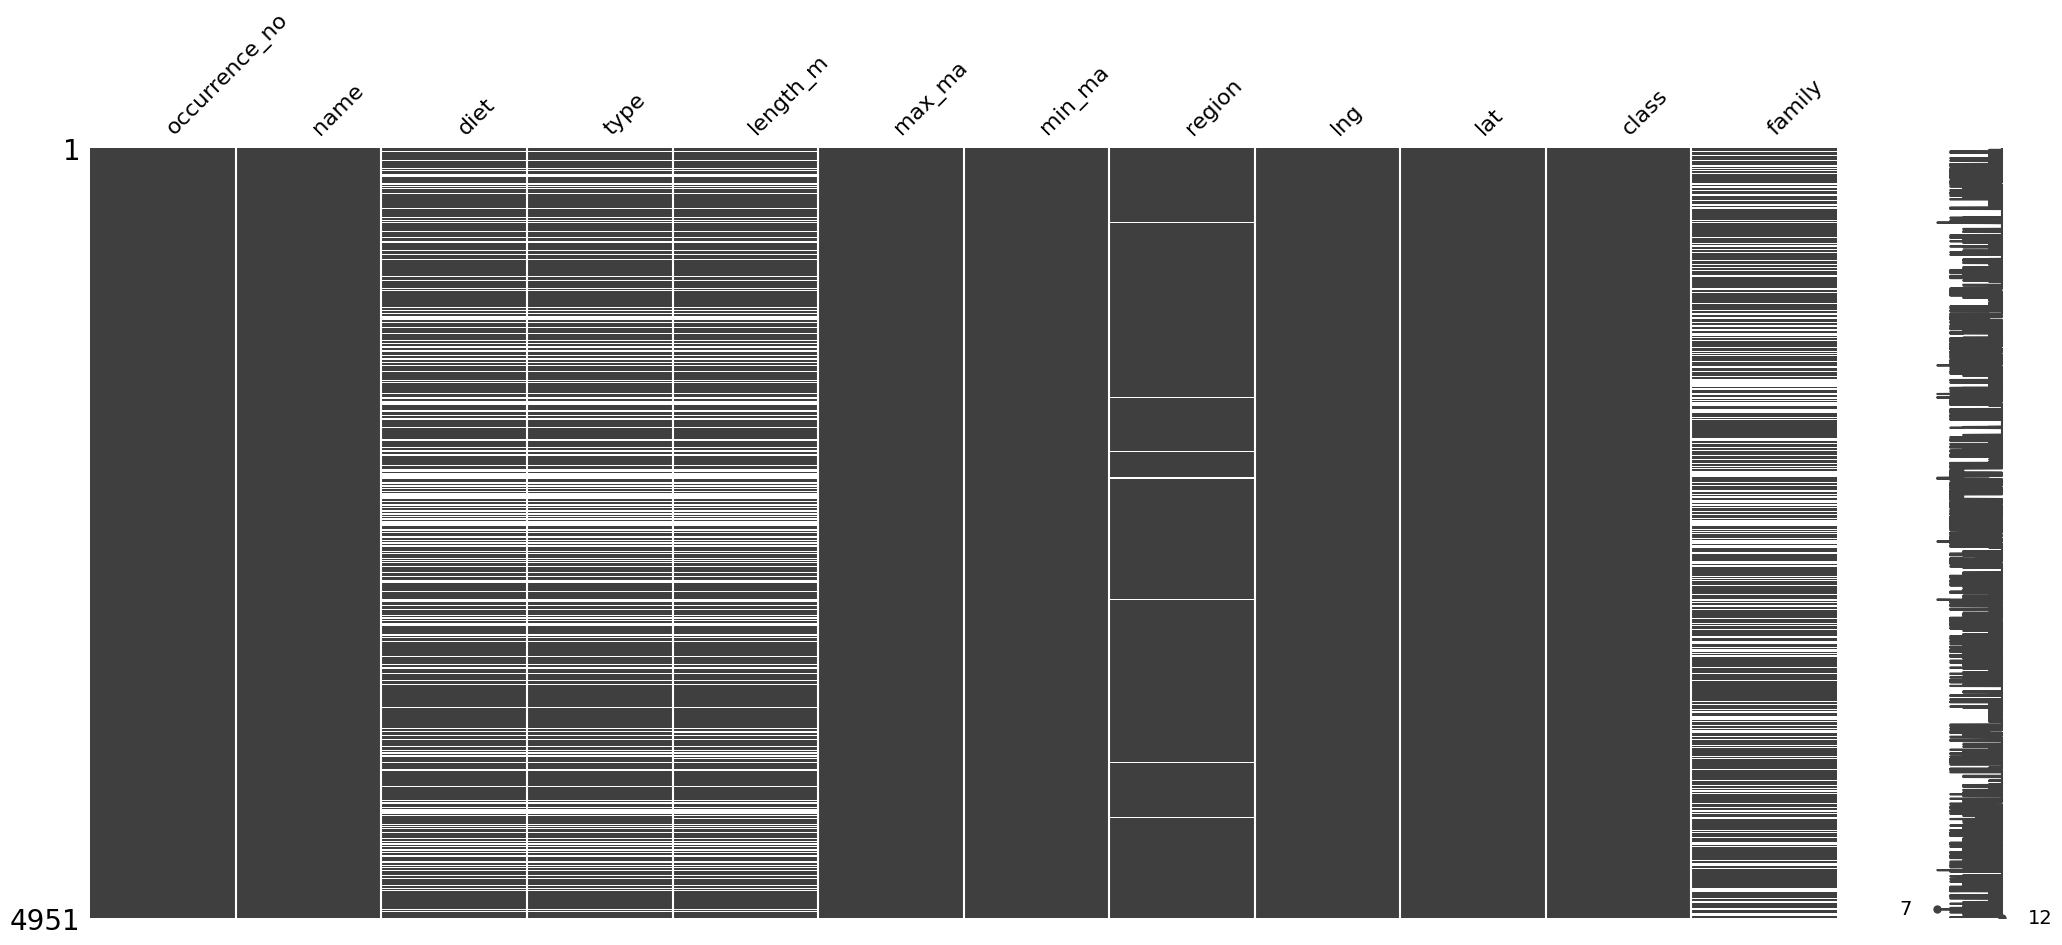

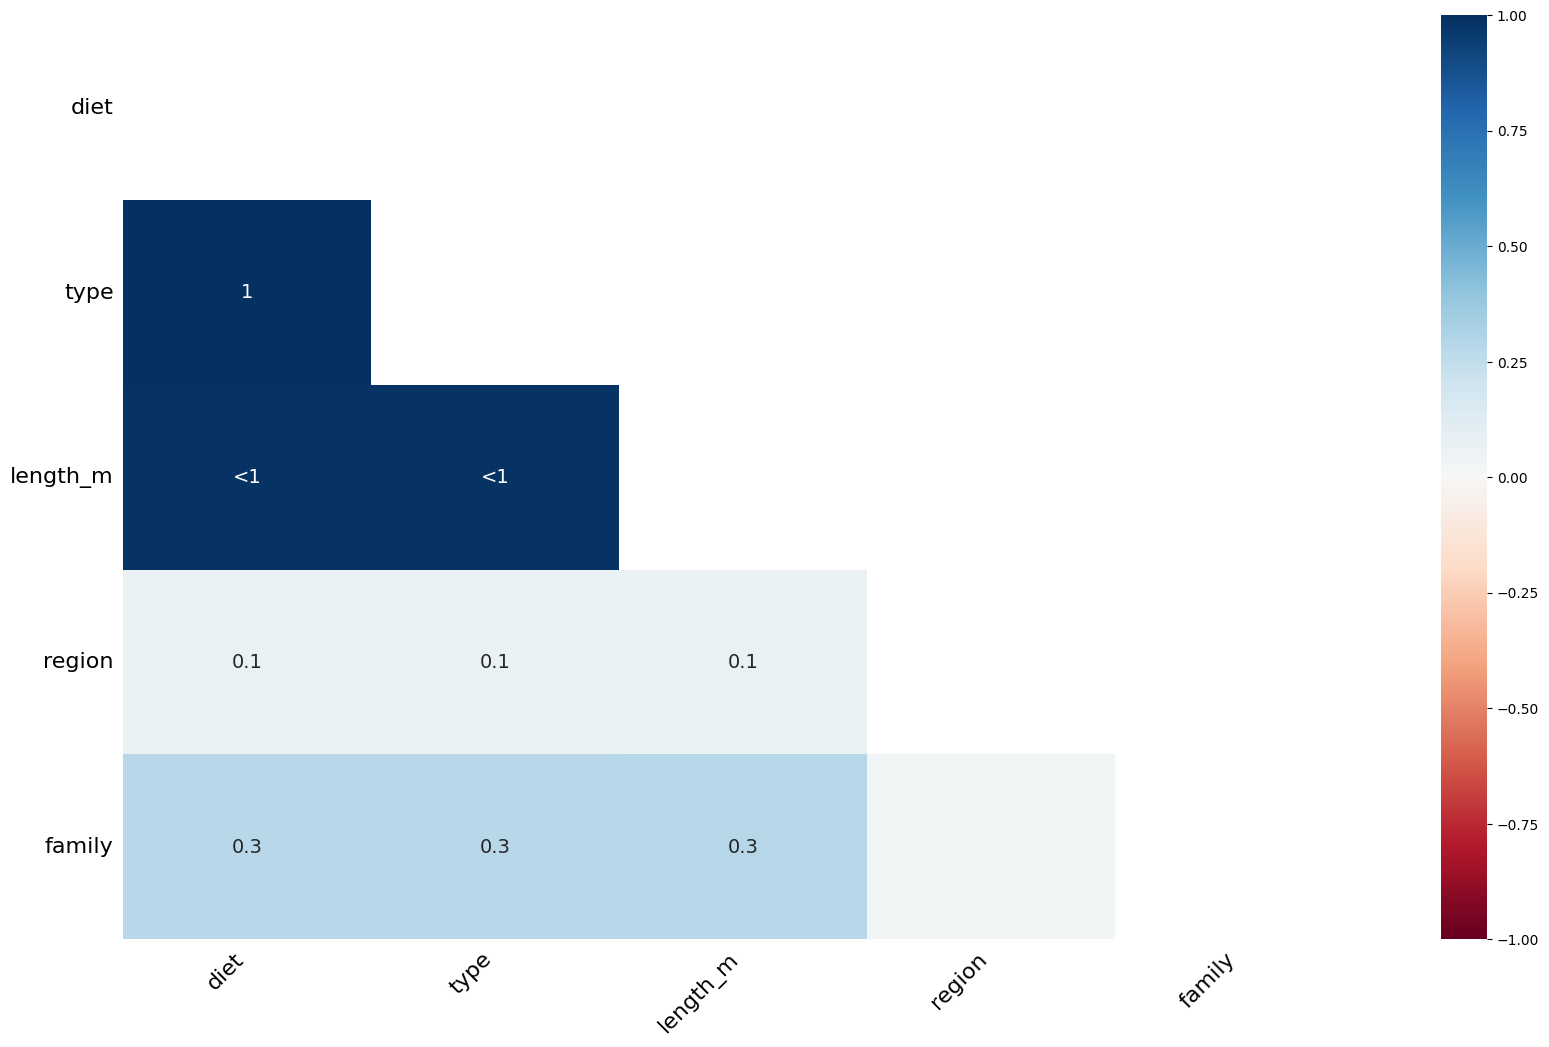

In [123]:
import missingno as msno

# Visualize missing data as a matrix
msno.matrix(dinosaurs)
plt.show()

# Visualize correlations in missing data
msno.heatmap(dinosaurs)
plt.show()

In [124]:
diet_class_table = pd.crosstab(dinosaurs['class'], dinosaurs['diet'])
print(diet_class_table)

diet          carnivorous  herbivorous  omnivorous
class                                             
Ornithischia            0         1481           0
Saurischia           1308          595         212


We know that all Ornithischia dinosaurs are herbivorous

In [125]:
# Fill missing diet values with "herbivorous" where the class is "Ornithischia"
dinosaurs.loc[(dinosaurs['diet'].isna()) & (dinosaurs['class'] == 'Ornithischia'), 'diet'] = 'herbivorous'

In [126]:
# Group by 'family' and count the number of unique 'type' values for each family
family_to_name = dinosaurs.groupby('name')['family'].nunique()

# Identify families associated with more than one type
inconsistent_families2 = family_to_name[family_to_name > 1]

In [127]:
# Group by 'family' and count the number of unique 'type' values for each family
type_to_name = dinosaurs.groupby('name')['type'].nunique()

# Identify families associated with more than one type
inconsistent_families3 = family_to_name[type_to_name > 1]

In [128]:
# Group by 'family' and count the number of unique 'type' values for each family
family_to_type = dinosaurs.groupby('family')['type'].nunique()

# Identify families associated with more than one type
inconsistent_families = family_to_type[family_to_type > 1]

In [129]:
inconsistent_families

family
Dromaeosauridae    2
Herrerasauridae    2
Ornithomimidae     2
Troodontidae       2
Name: type, dtype: int64

In [130]:
# List of families to exclude from the fill operation
excluded_families = ["Dromaeosauridae", "Herrerasauridae", "Ornithomimidae", "Troodontidae"]

# Create a mapping of 'family' to 'type' where 'type' is not null and 'family' is not in the excluded list
family_to_type = dinosaurs[~dinosaurs['family'].isin(excluded_families) & dinosaurs['type'].notna()].set_index('family')['type'].to_dict()

# Identify rows where 'type' is NaN, 'family' is not null, and 'family' is not in the excluded list
condition = dinosaurs['type'].isna() & dinosaurs['family'].notna() & ~dinosaurs['family'].isin(excluded_families)

# Use the family-to-type dictionary to fill in the missing 'type' values
dinosaurs.loc[condition, 'type'] = dinosaurs.loc[condition, 'family'].map(family_to_type)

# Fill missing values in the 'type' column with "small/large theropod" where 'family' is in excluded_families
dinosaurs.loc[(dinosaurs['family'].isin(excluded_families)) & (dinosaurs['type'].isna()), 'type'] = "small/large theropod"

In [131]:
dinosaurs.isna().sum()

occurrence_no       0
name                0
diet              959
type              828
length_m         1383
max_ma              0
min_ma              0
region             42
lng                 0
lat                 0
class               0
family           1457
dtype: int64

In [132]:
dinosaurs[(dinosaurs['type'].isna())& dinosaurs['family'].isin(excluded_families)]

,occurrence_no,name,diet,type,length_m,max_ma,min_ma,region,lng,lat,class,family


In [133]:
# Group by 'family' and count the number of unique 'type' values for each family
family_to_diet = dinosaurs.groupby('family')['diet'].nunique()

# Identify families associated with more than one type
inconsistent_families5 = family_to_diet[family_to_diet > 1]

In [134]:
inconsistent_families5

family
Massospondylidae     2
Ornithomimidae       2
Oviraptoridae        2
Therizinosauridae    3
Name: diet, dtype: int64

In [135]:
# List of families to exclude from the fill operation
excluded_diet_families = ["Massospondylidae", "Ornithomimidae", "Oviraptoridae", "Therizinosauridae"]

# Create a mapping of 'family' to 'type' where 'type' is not null and 'family' is not in the excluded list
family_to_diet = dinosaurs[~dinosaurs['family'].isin(excluded_families) & dinosaurs['diet'].notna()].set_index('family')['diet'].to_dict()

# Identify rows where 'type' is NaN, 'family' is not null, and 'family' is not in the excluded list
condition = dinosaurs['diet'].isna() & dinosaurs['family'].notna() & ~dinosaurs['family'].isin(excluded_families)

# Use the family-to-type dictionary to fill in the missing 'type' values
dinosaurs.loc[condition, 'diet'] = dinosaurs.loc[condition, 'family'].map(family_to_diet)

In [136]:
dinosaurs.isnull().sum()

occurrence_no       0
name                0
diet              730
type              828
length_m         1383
max_ma              0
min_ma              0
region             42
lng                 0
lat                 0
class               0
family           1457
dtype: int64

In [137]:
type_class_table = pd.crosstab(dinosaurs['class'], dinosaurs['type'])
print(type_class_table)

type          armored dinosaur  ceratopsian  large theropod  ornithopod  \
class                                                                     
Ornithischia               360          434               1         903   
Saurischia                   0            0             804           1   

type          sauropod  small theropod  small/large theropod  
class                                                         
Ornithischia         0               0                     0  
Saurischia         759             780                    81  


In [138]:
dinosaurs[(dinosaurs['class']=='Ornithischia') & (dinosaurs['type']=='large theropod')]

,occurrence_no,name,diet,type,length_m,max_ma,min_ma,region,lng,lat,class,family
3085,149987,Goyocephale,herbivorous,large theropod,2.0,86.3,66.0,Omnogov,102.066666,48.583332,Ornithischia,NaN


In [139]:
dinosaurs[(dinosaurs['name']=='Goyocephale')]

,occurrence_no,name,diet,type,length_m,max_ma,min_ma,region,lng,lat,class,family
3085,149987,Goyocephale,herbivorous,large theropod,2.0,86.3,66.0,Omnogov,102.066666,48.583332,Ornithischia,NaN


In [140]:
dinosaurs[(dinosaurs['class']=='Saurischia') & (dinosaurs['type']=='ornithopod')]

,occurrence_no,name,diet,type,length_m,max_ma,min_ma,region,lng,lat,class,family
145,284027,Pantydraco,herbivorous,ornithopod,3.0,208.5,201.3,Wales,-3.373889,51.459999,Saurischia,NaN


In [141]:
dinosaurs[(dinosaurs['name']=='Pantydraco')]

,occurrence_no,name,diet,type,length_m,max_ma,min_ma,region,lng,lat,class,family
145,284027,Pantydraco,herbivorous,ornithopod,3.0,208.5,201.3,Wales,-3.373889,51.459999,Saurischia,NaN


In [142]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [143]:
x = dinosaurs[(dinosaurs['family']=='Dromaeosauridae')]
x.groupby('type').nunique()

,occurrence_no,name,diet,length_m,max_ma,min_ma,region,lng,lat,class,family
type,,,,,,,,,,,
large theropod,3,2,1,2,3,3,2,3,3,1,1
small theropod,399,11,1,9,19,16,35,238,233,1,1
small/large theropod,48,23,0,0,11,10,22,40,39,1,1


In [144]:
x = dinosaurs[(dinosaurs['family']=='Herrerasauridae')]
x.groupby('type').nunique()

,occurrence_no,name,diet,length_m,max_ma,min_ma,region,lng,lat,class,family
type,,,,,,,,,,,
large theropod,1,1,1,1,1,1,1,1,1,1,1
small theropod,18,2,1,2,3,4,4,12,12,1,1
small/large theropod,3,2,0,0,2,3,3,3,3,1,1


In [145]:
x = dinosaurs[(dinosaurs['family']=='Ornithomimidae')]
x.groupby('type').nunique()

,occurrence_no,name,diet,length_m,max_ma,min_ma,region,lng,lat,class,family
type,,,,,,,,,,,
large theropod,65,3,2,3,8,5,14,58,62,1,1
small theropod,4,1,1,1,2,3,3,4,4,1,1
small/large theropod,4,4,0,0,4,4,4,4,4,1,1


In [146]:
x = dinosaurs[(dinosaurs['family']=='Troodontidae')]
x.groupby('type').nunique()

,occurrence_no,name,diet,length_m,max_ma,min_ma,region,lng,lat,class,family
type,,,,,,,,,,,
large theropod,99,1,1,1,10,8,15,85,83,1,1
small theropod,120,5,1,4,8,6,13,111,106,1,1
small/large theropod,26,15,0,0,9,9,11,21,21,1,1


Filling the Region missing values based on it's longitude and latitude

In [147]:
def fill_region(row, df):
    if pd.isnull(row['region']):
        lat = row['lat']
        lng = row['lng']
        
        # Filter rows where lat and lng are within ±1, and 'region' is not null
        matching_rows = df[(np.abs(df['lat'] - lat) < 5) & 
                           (np.abs(df['lng'] - lng) < 5) & 
                           df['region'].notnull()]
        
        if not matching_rows.empty:
            # Calculate distances between the current row and matching rows
            matching_rows['distance'] = np.sqrt((matching_rows['lat'] - lat)**2 + 
                                                (matching_rows['lng'] - lng)**2)
            
            # Get the row with the minimum distance
            closest_row = matching_rows.loc[matching_rows['distance'].idxmin()]
            
            # Return the region from the closest row
            return closest_row['region']
    
    return row['region']

# Apply the function to each row in the dataset using 'axis=1' for row-wise application
dinosaurs['region'] = dinosaurs.apply(lambda row: fill_region(row, dinosaurs), axis=1)


In [148]:
dinosaurs.isna().sum()

occurrence_no       0
name                0
diet              730
type              828
length_m         1383
max_ma              0
min_ma              0
region             12
lng                 0
lat                 0
class               0
family           1457
dtype: int64

In [149]:
# Replace missing values in the specified categorical columns with 'NULL'
columns_to_fill = ['diet', 'type', 'region', 'family']

# Using fillna() to replace NaN values with 'NULL'
dinosaurs[columns_to_fill] = dinosaurs[columns_to_fill].fillna('NULL')

### 2.3 Check for Duplicated Rows

In [150]:
dinosaurs.duplicated().sum()

np.int64(0)

### 2.4 Unique Values

In [151]:
dinosaurs.nunique()

occurrence_no    4951
name             1042
diet                4
type                8
length_m           71
max_ma             57
min_ma             57
region            288
lng              2472
lat              2423
class               2
family             76
dtype: int64

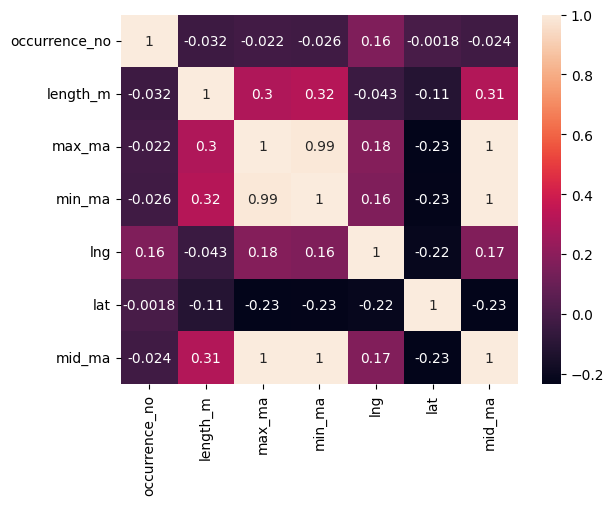

In [182]:
numerical_cols = dinosaurs.select_dtypes(include='number')
sns.heatmap(numerical_cols.corr(),  annot= True)
plt.show()

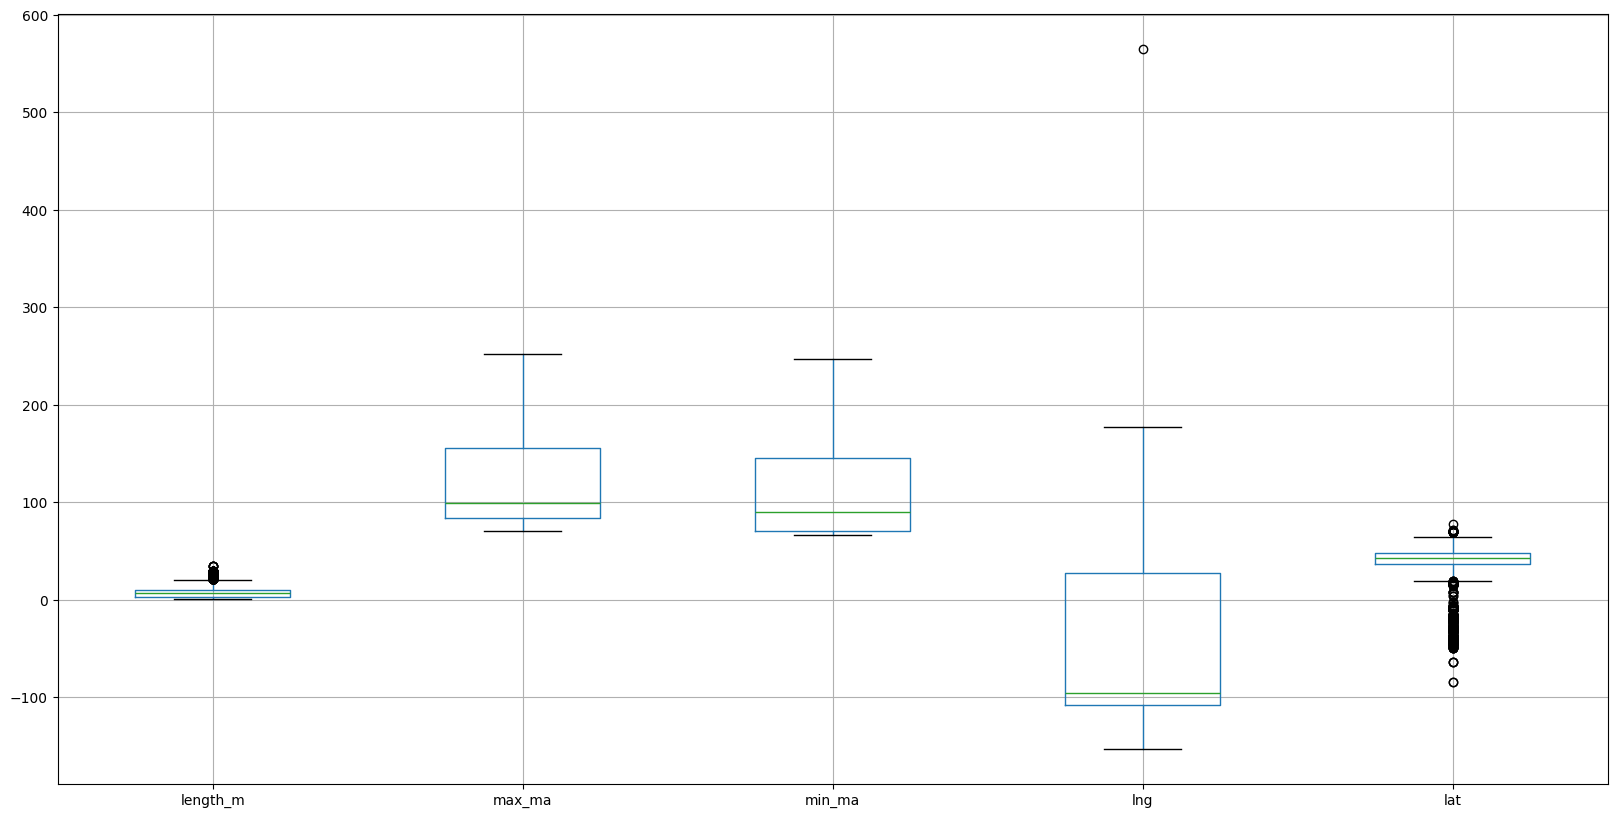

In [153]:

dinosaurs.drop(columns='occurrence_no').boxplot(figsize=(20,10))
plt.show()

In [154]:
mean_stats = dinosaurs.groupby('type').agg({
    'length_m': 'mean',
    'max_ma': 'mean',
    'min_ma': 'mean',
    'lat': 'mean',
    'lng': 'mean'
})
mean_stats

,length_m,max_ma,min_ma,lat,lng
type,,,,,
NULL,NaN,143.461353,131.052512,24.263895,0.635481
armored dinosaur,6.284488,119.481583,108.624778,39.209898,-41.772145
ceratopsian,5.692676,87.576382,76.114931,45.138952,-47.220624
large theropod,8.860383,108.300174,98.671677,36.655621,-35.870352
ornithopod,7.135634,101.447832,90.922323,41.411853,-53.485388
sauropod,17.842169,155.572727,145.004809,21.621319,-25.162153
small theropod,1.893543,98.544910,87.447449,39.582222,-66.660732
small/large theropod,NaN,101.126543,90.672099,39.963964,-1.266383


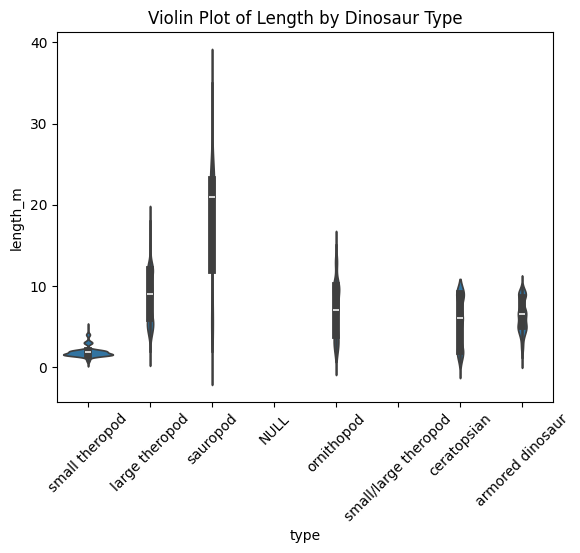

In [155]:
sns.violinplot(x='type', y='length_m', data=dinosaurs)
plt.title('Violin Plot of Length by Dinosaur Type')
plt.xticks(rotation=45)
plt.show()

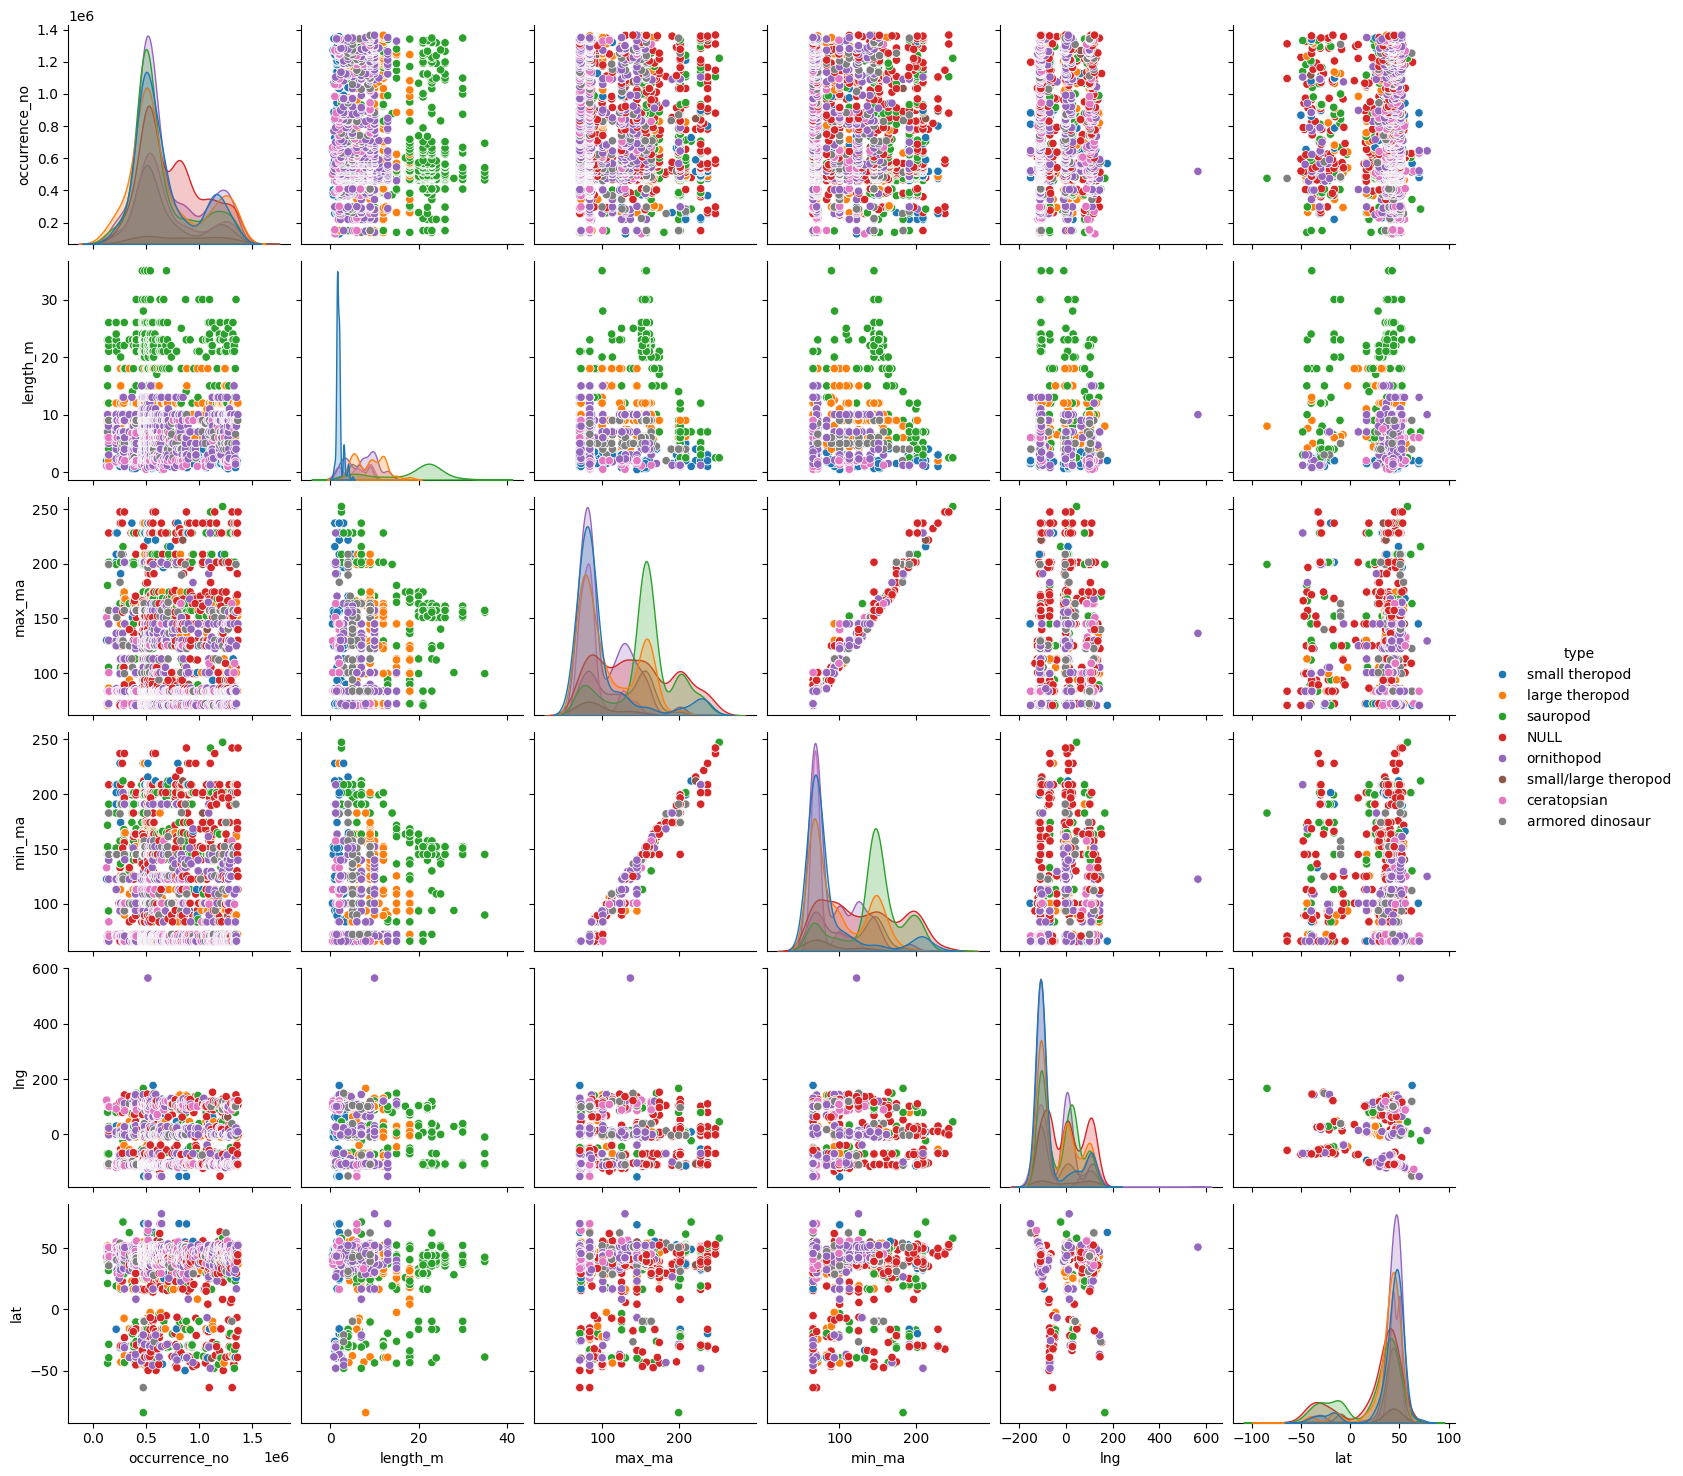

In [156]:
# Pair plot with hue set to a categorical variable
sns.pairplot(dinosaurs, hue='type')
plt.show()

In [157]:
dinosaurs.groupby('type').agg({
    'occurrence_no':'count',
    'lat':'mean',
    'lng':'mean'
})

,occurrence_no,lat,lng
type,,,
NULL,828,24.263895,0.635481
armored dinosaur,360,39.209898,-41.772145
ceratopsian,434,45.138952,-47.220624
large theropod,805,36.655621,-35.870352
ornithopod,904,41.411853,-53.485388
sauropod,759,21.621319,-25.162153
small theropod,780,39.582222,-66.660732
small/large theropod,81,39.963964,-1.266383


In [158]:
df= dinosaurs[dinosaurs['type']=='ceratopsian']

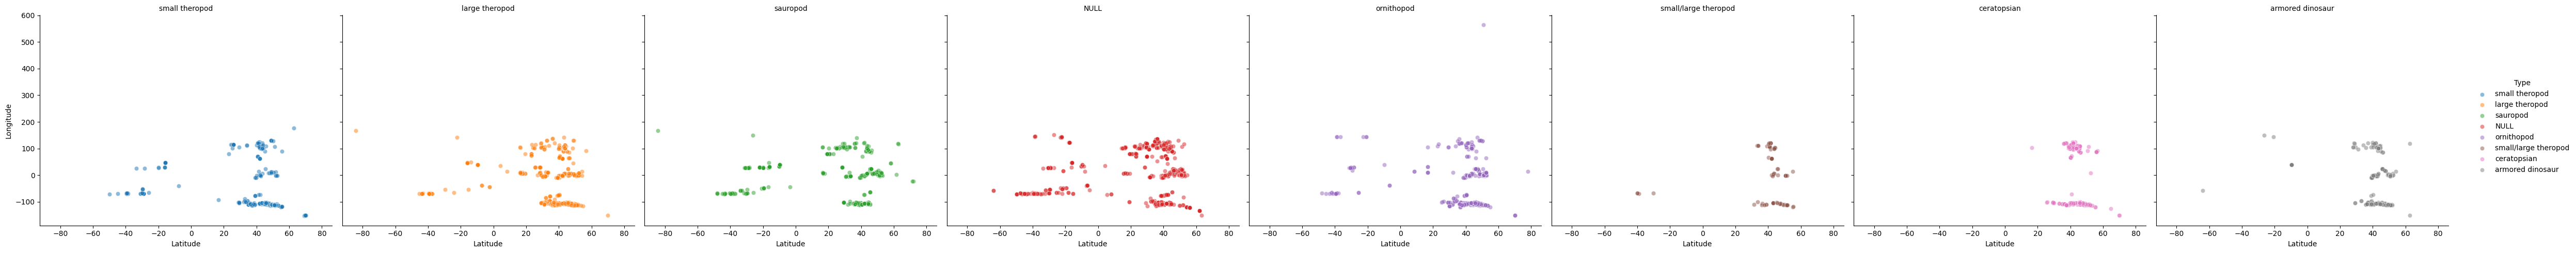

In [159]:

# Create a FacetGrid
g = sns.FacetGrid(dinosaurs, col='type', hue='type', sharex=True, sharey=True, height=5, aspect=1.2)

# Map the scatter plot onto the grid
g.map(sns.scatterplot, 'lat', 'lng', alpha=0.5)

# Add titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Latitude", "Longitude")
g.add_legend(title='Type')

# Show the plot
plt.show()

In [160]:
import scipy.stats as stats

In [161]:
contingency_table = pd.crosstab(dinosaurs['region'], dinosaurs['type'])

In [162]:
# Perform the Chi-Square test
chi2, p, _, _ = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")

Chi-Square Statistic: 6413.421718443084
P-Value: 0.0


In [163]:

# Assuming 'chi2' is your Chi-Square Statistic and 'df' is the degrees of freedom
n = contingency_table.sum().sum()  # Total number of observations
phi2 = chi2 / n
r, k = contingency_table.shape
cramers_v = np.sqrt(phi2 / min(k - 1, r - 1))
print(f"Cramer's V: {cramers_v}")

Cramer's V: 0.4301792082479015


In [164]:
dinosaurs[dinosaurs['type']=='NULL'].groupby('name').size().head(10)

name
Abelichnus         2
Abrosaurus         1
Adamantisaurus     1
Aeolosaurus        6
Aerosteon          1
Ajkaceratops       1
Albalophosaurus    1
Albertonykus       1
Albinykus          1
Altirhinus         1
dtype: int64

In [167]:
print(dinosaurs['type'].unique())

['small theropod' 'large theropod' 'sauropod' 'NULL' 'ornithopod'
 'small/large theropod' 'ceratopsian' 'armored dinosaur']


In [181]:
dinosaur_age_range = dinosaurs.groupby('type').agg(
    max_age=('max_ma', 'mean'),
    min_age=('min_ma', 'mean'),
).reset_index()

print(dinosaur_age_range)


                   type     max_age     min_age
0                  NULL  143.461353  131.052512
1      armored dinosaur  119.481583  108.624778
2           ceratopsian   87.576382   76.114931
3        large theropod  108.300174   98.671677
4            ornithopod  101.447832   90.922323
5              sauropod  155.572727  145.004809
6        small theropod   98.544910   87.447449
7  small/large theropod  101.126543   90.672099


In [197]:
dinosaurs[dinosaurs['length_m'].isna()].describe()

,occurrence_no,length_m,max_ma,min_ma,lng,lat,mid_ma
count,1.383000e+03,0.0,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000
mean,7.524083e+05,NaN,128.977296,117.187657,-7.260751,25.415121,123.082477
std,3.004002e+05,NaN,48.945619,47.972440,87.095400,30.428759,48.291084
min,1.443070e+05,NaN,70.600000,66.000000,-151.578232,-84.333336,68.300000
25%,5.139200e+05,NaN,83.600000,70.600000,-101.357502,22.816700,77.050000
50%,6.829200e+05,NaN,125.000000,100.500000,-2.091770,39.001003,112.750000
75%,9.730655e+05,NaN,163.500000,152.100000,80.169490,43.840151,155.350000
max,1.365954e+06,NaN,247.200000,242.000000,166.449997,70.071365,244.600000


In [207]:
missing_length = dinosaurs[dinosaurs['length_m'].isna()]
type_counts = missing_length['type'].value_counts()

# Plot bar chart
type_counts

type
NULL                    828
ornithopod              107
sauropod                 95
small/large theropod     81
ceratopsian              79
large theropod           73
small theropod           63
armored dinosaur         57
Name: count, dtype: int64

In [209]:
dinosaurs.groupby('type')['length_m'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
NULL,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
armored dinosaur,303.0,6.284488,2.028813,1.20,5.0,6.5,8.5,10.0
ceratopsian,355.0,5.692676,3.004977,0.50,2.0,6.0,9.0,9.0
large theropod,732.0,8.860383,3.461690,2.00,6.0,9.0,12.0,18.0
ornithopod,797.0,7.135634,3.378670,0.80,4.0,7.0,10.0,15.0
sauropod,664.0,17.842169,7.704324,2.00,12.0,21.0,23.0,35.0
small theropod,717.0,1.893543,0.684190,0.45,1.5,1.8,2.0,5.0
small/large theropod,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [211]:
dinosaurs_notnull=dinosaurs[dinosaurs['length_m'].notnull()]

In [212]:
dinosaurs_notnull.describe()

,occurrence_no,length_m,max_ma,min_ma,lng,lat,mid_ma
count,3.568000e+03,3568.000000,3568.000000,3568.000000,3568.000000,3568.000000,3568.000000
mean,6.572514e+05,8.212688,113.076900,102.526998,-48.594835,38.148304,107.801949
std,2.986649e+05,6.629887,42.956223,42.231457,80.707473,19.816738,42.481445
min,1.302090e+05,0.450000,70.600000,66.000000,-153.247498,-84.333336,68.300000
25%,4.819355e+05,3.000000,83.500000,66.000000,-108.811302,38.830483,74.750000
50%,5.401425e+05,6.700000,83.600000,72.100000,-104.611786,43.540001,77.850000
75%,7.863962e+05,10.000000,155.700000,145.000000,8.658135,48.737474,150.350000
max,1.364695e+06,35.000000,252.170000,247.200000,565.000000,78.101875,249.685000


## 3. Methodology

## 4. Results
### 4.1. Dinosaurs Diversity within Our Dataset

**This dataset contains 4,951 records and 1,042 unique dinosaur names that are present in the data**

In [169]:
dinosaurs['name'].nunique()

1042

The dinosars are divided into two main classes, each class is consisted on 3 different dinasuar types. <br>
1- Saurischia:<br>
    * <br>
2- Ornithischia:<br>
    * <br>

These categories are further divided into families to contain total of 75 family types of dinosaurs.

### 4.2. Identify The Largest Dinosaurs

**The Supersaurus and Argentinosaurus from Sauropod dinosaur type are the largest dinosaurs with 35 meters length.
There are 1383 rows missing length data value which is about 28% of all of records.**

In [170]:
largest_dinosaurs = dinosaurs[dinosaurs['length_m']==dinosaurs['length_m'].max()]
print(largest_dinosaurs)

      occurrence_no             name         diet      type  length_m  max_ma  \
570          465134      Supersaurus  herbivorous  sauropod      35.0   155.7   
924          489575      Supersaurus  herbivorous  sauropod      35.0   155.7   
1165         513500  Argentinosaurus  herbivorous  sauropod      35.0    99.6   
1423         541209      Supersaurus  herbivorous  sauropod      35.0   157.3   
1972         693186      Supersaurus  herbivorous  sauropod      35.0   157.3   

      min_ma       region         lng        lat       class        family  
570    145.0     Colorado -108.397202  38.583099  Saurischia  Diplodocidae  
924    145.0  Estremadura   -9.343696  39.216393  Saurischia  Diplodocidae  
1165    89.8      Neuquén  -69.059998 -38.916672  Saurischia          NULL  
1423   145.0     Colorado -109.036133  39.200081  Saurischia  Diplodocidae  
1972   145.0      Wyoming -105.439041  42.629375  Saurischia  Diplodocidae  


All largest dinosaurs are from the same family (and one is null)

In [171]:
dinosaurs[dinosaurs['family']=='Diplodocidae'].groupby('type')['length_m'].mean()

type
sauropod    23.908451
Name: length_m, dtype: float64

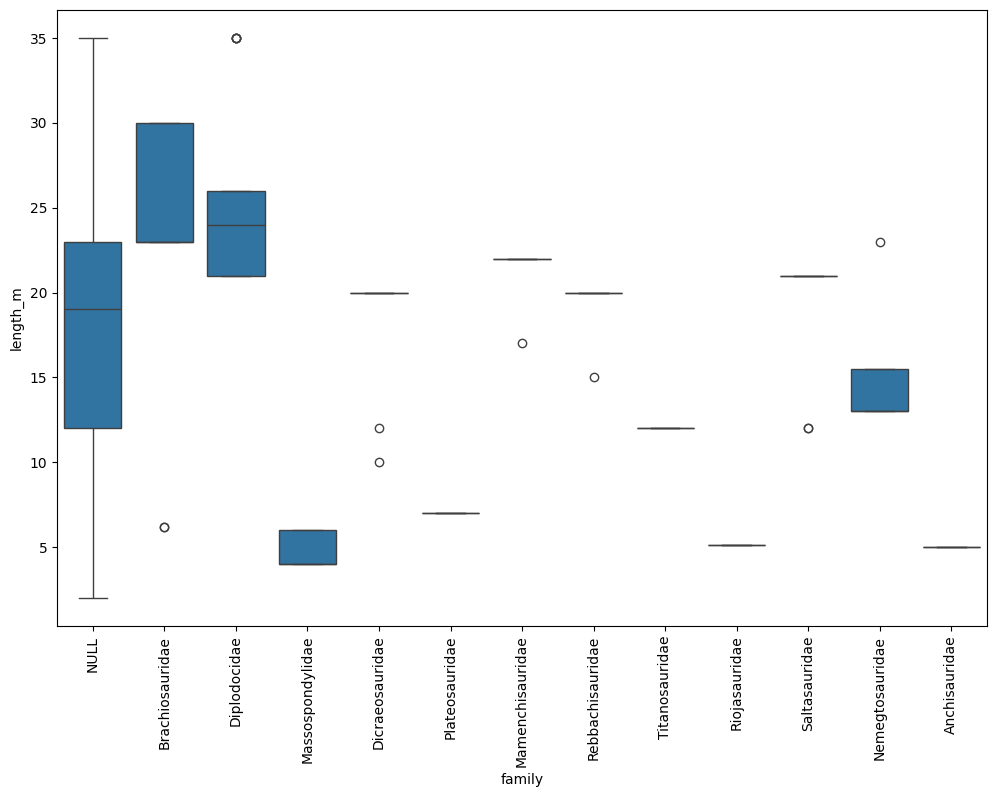

In [172]:
sauropod= dinosaurs[dinosaurs['type']=='sauropod']
plt.figure(figsize=(12, 8))
sns.boxplot(x='family', y='length_m', data=sauropod)
plt.xticks(rotation=90)  # Rotate x labels for readability
plt.show()


In [173]:
sauropod.groupby('family').agg({'length_m': 'mean'}).sort_values(by='length_m')


,length_m
family,
Massospondylidae,4.576271
Anchisauridae,5.000000
Riojasauridae,5.150000
Plateosauridae,7.000000
Titanosauridae,12.000000
Nemegtosauridae,15.500000
NULL,17.255597
Rebbachisauridae,19.000000
Dicraeosauridae,19.100000


In [174]:
grouped_stats = dinosaurs.groupby('type')['length_m'].agg(['mean', 'median', 'std'])
print(grouped_stats)

                           mean  median       std
type                                             
NULL                        NaN     NaN       NaN
armored dinosaur       6.284488     6.5  2.028813
ceratopsian            5.692676     6.0  3.004977
large theropod         8.860383     9.0  3.461690
ornithopod             7.135634     7.0  3.378670
sauropod              17.842169    21.0  7.704324
small theropod         1.893543     1.8  0.684190
small/large theropod        NaN     NaN       NaN


In [175]:
dinosaurs.groupby('family').agg({'length_m': 'mean'}).sort_values(by='length_m', ascending=False)


,length_m
family,
Brachiosauridae,24.306667
Diplodocidae,23.908451
Mamenchisauridae,21.791667
Saltasauridae,20.379310
Dicraeosauridae,19.100000
...,...
Sauropodidae,NaN
Scansoriopterygidae,NaN
Subtiliolithidae,NaN


### 4.3. Dinosaurs with Most Frequency

**Based on the bar plot shown below Ornithopod type with 811 records has the most occurrences in this dataset**

In [176]:
print(dinosaurs['type'].value_counts())

type
ornithopod              904
NULL                    828
large theropod          805
small theropod          780
sauropod                759
ceratopsian             434
armored dinosaur        360
small/large theropod     81
Name: count, dtype: int64


Bar plot per dinosaur type:

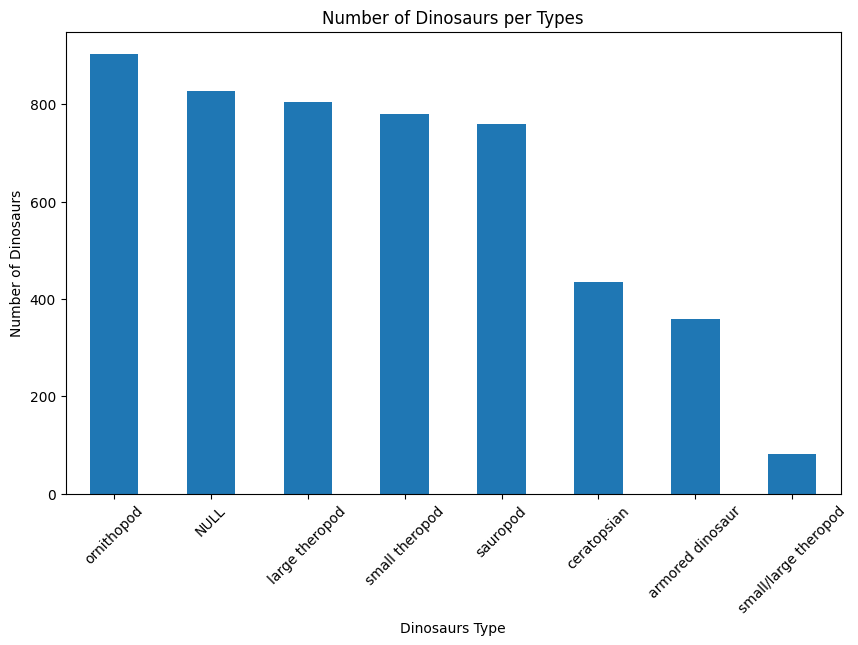

In [177]:
# Count the occurrences of each value in Column 'type'
type_counts = dinosaurs['type'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar')

# Add titles and labels
plt.title('Number of Dinosaurs per Types')
plt.xlabel('Dinosaurs Type')
plt.ylabel('Number of Dinosaurs')
plt.xticks(rotation=45)
# Display the bar chart
plt.show()

### 4.4. Dinosaurs' Size Trend


**The data does not necessarily show a consistent grow of dinosaurs' length over time. Ther are fewer fossils that were found from dinosaurs of 200 to 300 million years age and although the records of those fossils all have lower than 15 meters length, this cannot demonstrate an increase in size of dinosaurs over time. Because there are numerous fossils found from dinosaurs of less than 75 million years age that are shorter than 5 meters.**

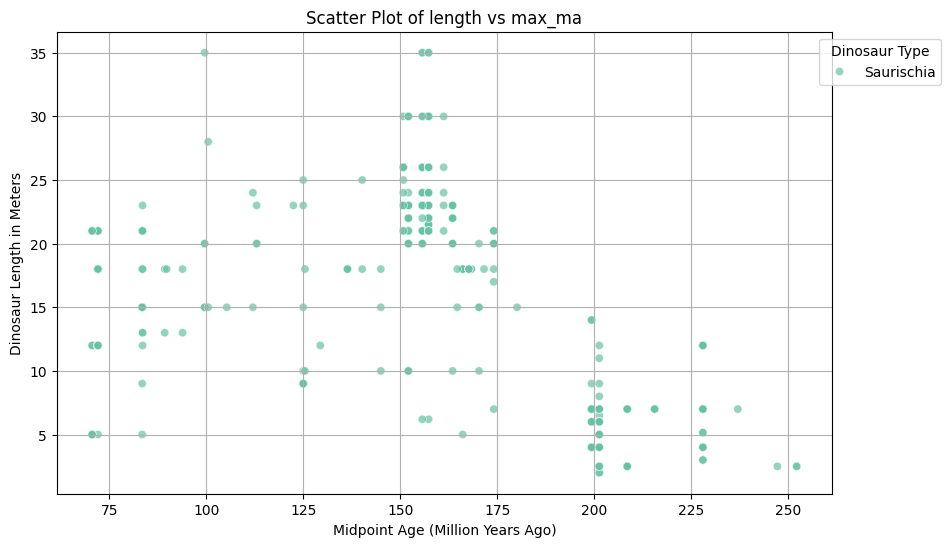

In [178]:
import matplotlib.pyplot as plt

dinosaurs ['mid_ma'] = (dinosaurs ['max_ma']+ dinosaurs ['min_ma'])/2
plt.figure(figsize=(10, 6))
sns.scatterplot(x='max_ma', y='length_m', hue='class', data=sauropod, palette='Set2', alpha=0.7)

# Add titles and labels
plt.title('Scatter Plot of length vs max_ma')
plt.xlabel('Midpoint Age (Million Years Ago)')
plt.ylabel('Dinosaur Length in Meters')
plt.grid(True)

plt.legend(title="Dinosaur Type", loc='upper right', bbox_to_anchor=(1.15, 1))

# Display the scatter plot
plt.show()

### 4.5. Interactive map showing each record


In [179]:
m = folium.Map(location=[dinosaurs['lat'].mean(), dinosaurs['lng'].mean()], zoom_start=1)
marker_cluster = MarkerCluster().add_to(m)

for idx, row in dinosaurs.iterrows():
    # Assign a color based on the dinosaur class
   # marker_color = 'blue' if row['class'] == 'Ornithischia' else 'red'  # Assuming 2 classes: 'Class1' and others
    
    # Add a folium marker to the map
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=f"Record {row['occurrence_no']}\nName: {row['name']}\nRegion: {row['region']}", 
        icon=folium.Icon(color=marker_color)
    ).add_to(marker_cluster)
# Display the map in a Jupyter notebook
#m # Remove the first # sign to see the map

NameError: name 'marker_color' is not defined

**Note:** The interactive map won't display on GitHub. Here is the static view of the map:

![Map](./map.jpg)

### 4.6. **Other insights from analysis** 
#### 1. The median length of dinosaur records is 6.7 meters and most of the records found are shorter than 10 meters long.

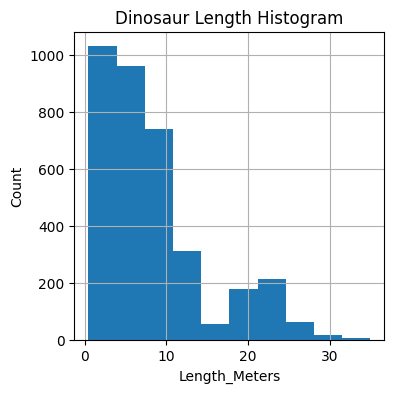

In [161]:
dinosaurs['length_m'].hist(figsize=(4, 4))
plt.title('Dinosaur Length Histogram')
plt.xlabel('Length_Meters')
plt.ylabel('Count')
plt.grid(True)

#### 2. The oldest fossil record belongs to ~252 million years ago and the youngest belongs to ~66 million years ago.

<Axes: >

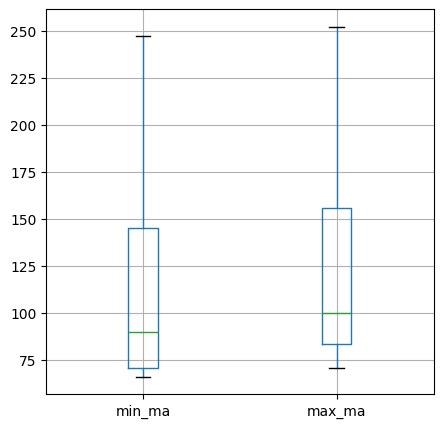

In [162]:
columns_to_include = ['min_ma','max_ma']
dinosaurs[columns_to_include].boxplot(figsize=(5, 5))

#### 3. The diet of most of the dinosaurs in this table is herbivorous


In [163]:
print(dinosaurs['diet'].unique())
print(dinosaurs['diet'].value_counts())

['omnivorous' 'carnivorous' 'herbivorous' 'NULL']
diet
herbivorous    2563
carnivorous    1398
NULL            730
omnivorous      260
Name: count, dtype: int64


#### 4. The plot below shows how the type of the dinasour is related with it's size. Sauropod as mentioned before is the type with largest body. And Small Theropods have the smallest body.


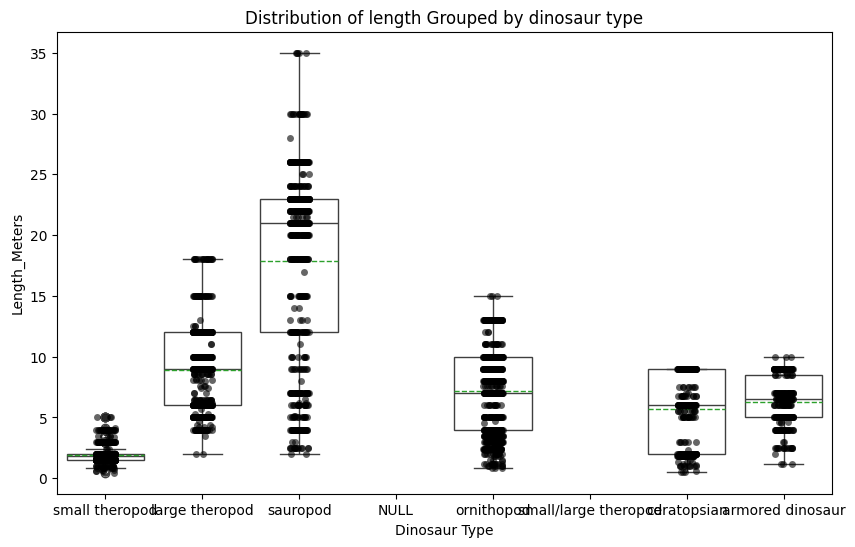

In [164]:
import seaborn as sns
# Initialize the figure
plt.figure(figsize=(10, 6))

# Create a boxplot
sns.boxplot(x='type', y='length_m', data= dinosaurs, showmeans=True, meanline=True,
            boxprops={'facecolor':'None'})  # Add mean line and show mean

# Overlay a stripplot to show all data points
sns.stripplot(x='type', y='length_m', data=dinosaurs, jitter=True, color='black', alpha=0.6)

# Add a title and labels
plt.title('Distribution of length Grouped by dinosaur type')
plt.xlabel('Dinosaur Type')
plt.ylabel('Length_Meters')

# Show the plot
plt.show()